# Refit NMF for selected samples

In [2]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
import matplotlib.pyplot as plt
from utils import correlation_map_with_CCF

## load the data

In [3]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections']
original_shape = data.shape
d = data.shape[1] * data.shape[2] * data.shape[3]
data = np.reshape(data, (data.shape[0], d))

## load the NMF result 

In [3]:
f = np.load('../code/reza/nmf_result_ncomp_18.npz')
#f = np.load('../data/stability_result_comp_18_0.npz')
PPs = f['A']
original_shape = f['original_shape']
X_guess = f['X_guess']
coefs = f['D']

## compute the entropy of coefs

In [16]:
normalized = coefs / np.sum(coefs, 1, keepdims=True)
entropy = np.sum(-(np.log(normalized + 1e-15)) / np.log(18) * normalized, 1)

## refit NMF

In [5]:
nmf = nmf_with_missing_values(n_outer_loops = 4, n_components = 18)
ratio = 0.1
refit_coefs = nmf.fit_transform(data[entropy < np.quantile(entropy, ratio), :])
refit_PPs = nmf.components_

## save results

In [8]:
np.savez('../data/nmf_refit_result_ncomp_'+str(refit_PPs.shape[0])+'_ratio_' + str(ratio) + '.npz', PPs = refit_PPs, 
         coefs = refit_coefs, X_guess = nmf.X_guess, data = data, original_shape = original_shape)

## reload results

In [4]:
f = np.load('../data/nmf_refit_result_ncomp_18_ratio_0.1.npz')
refit_coefs = f['coefs']
original_shape = f['original_shape']
X_guess = f['X_guess']
refit_PPs = f['PPs']

## compute the correlation with ABA CCF

- original

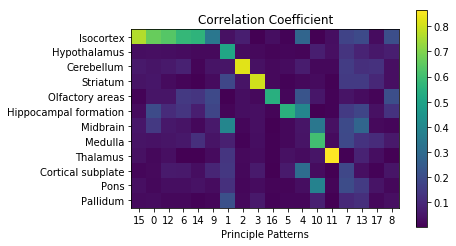

In [4]:
corr_mat = correlation_map_with_CCF(PPs, original_shape, order_type=2,area_order=[1,9,3,11,4,8,0,2,10,5,6,7], put_last_k=4)

- refit

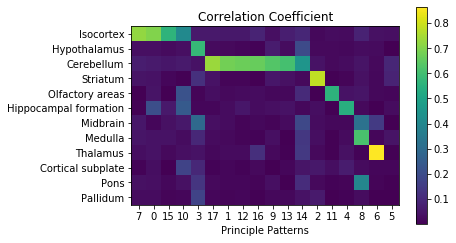

In [7]:
corr_mat = correlation_map_with_CCF(refit_PPs, original_shape, order_type=2,area_order=[1,9,3,11,4,8,0,2,10,5,6,7], put_last_k=1)

In [17]:
data[entropy > np.quantile(entropy, 0.9),:].shape

(435, 159326)

In [26]:
D_cube = data[entropy < np.quantile(entropy, 0.1)].reshape([435] + list(original_shape[1:])) 

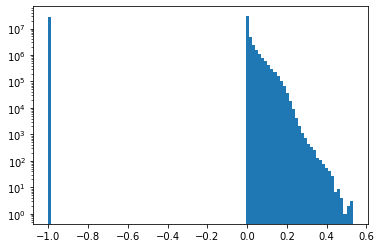

In [27]:
plt.hist(D_cube.flatten(), 100)
plt.yscale('log')
plt.show()

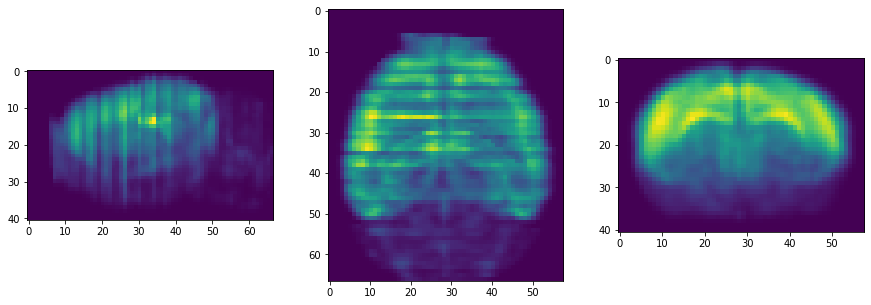

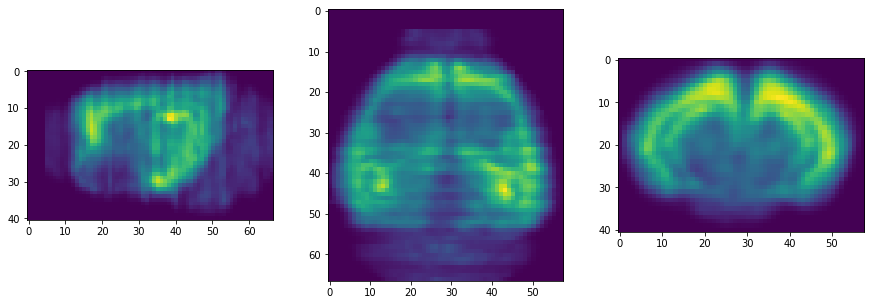

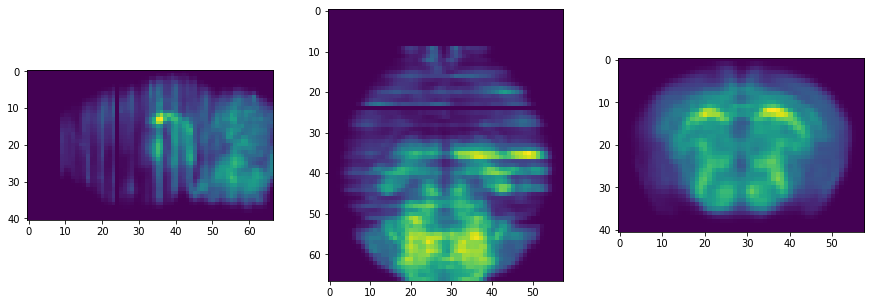

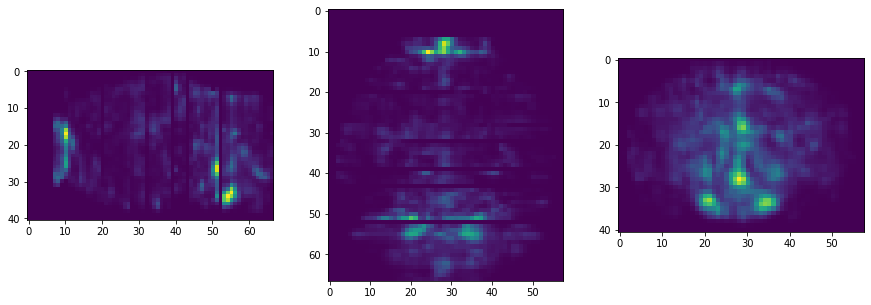

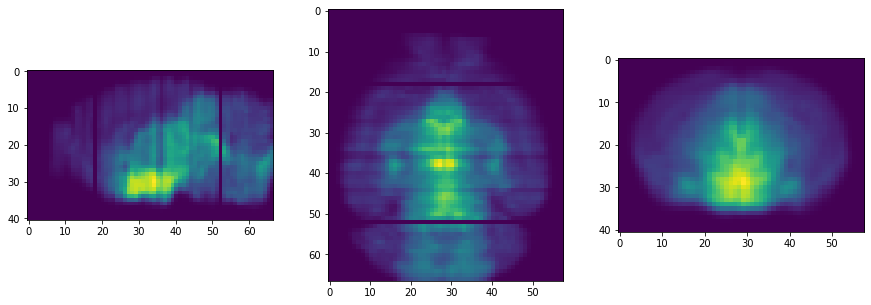

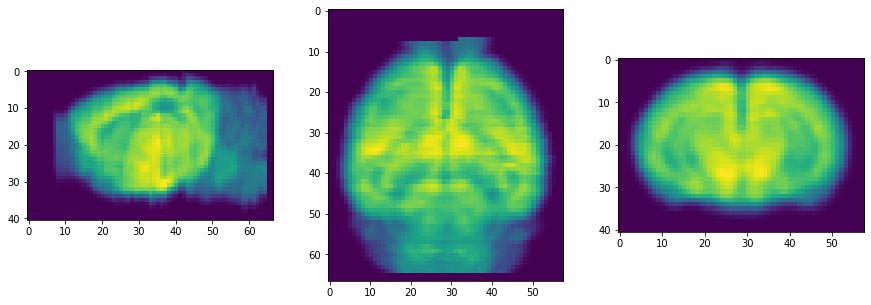

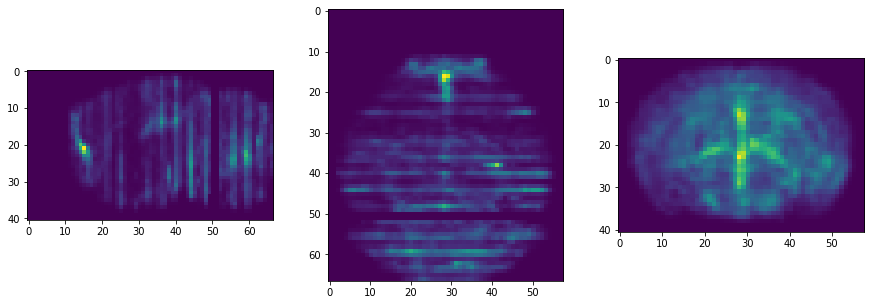

In [29]:
D_shrink = np.maximum(D_cube - 0., 0)
for i in [17, 1, 12, 16, 9, 13, 14]:
    _, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
    a.imshow(np.mean(D_shrink[i, :, :, :], 2).T)
    b.imshow(np.mean(D_shrink[i, :, :, :], 1))
    c.imshow(np.mean(D_shrink[i, :, :, :], 0))
    #a.text(1, 3, 'PP {}'.format(i), color='w', fontsize=15)
    #b.text(1, 3, 'PP {}'.format(i), color='w', fontsize=15)
    #c.text(1, 3, 'PP {}'.format(i), color='w', fontsize=15)

In [31]:
data.shape

(4345, 159326)

In [33]:
np.mean(data > -1)

0.5977852460104993

In [34]:
original_shape

array([4345,   67,   41,   58])

Text(7, 0.6, 'fail')

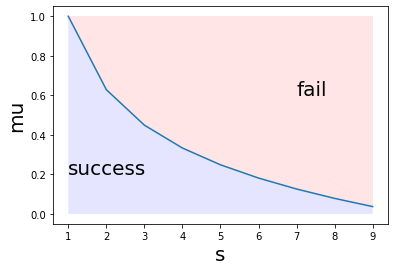

In [69]:
K = 10
s = np.arange(1, K)
mu = np.arange(0.1, 0.9, step = 0.05)
line1 = (K - s) / (K - 1) / s ** .5
plt.plot(s, line1)
plt.xlabel("s", fontsize=20)
plt.ylabel("mu", fontsize=20)
plt.fill(s, line1, facecolor='red', alpha=0.1)
plt.fill([1, 9, 9], [1, 1, line1[-1]], facecolor='red', alpha=0.1)
plt.fill([1] + list(s) + [9, 1], [0,] +  list(line1) + [0, 0], facecolor='blue', alpha=0.1)
plt.text(1, .2, 'success', fontsize = 20)
plt.text(7, .6, 'fail', fontsize = 20)

Text(7, 0.2, 'fail')

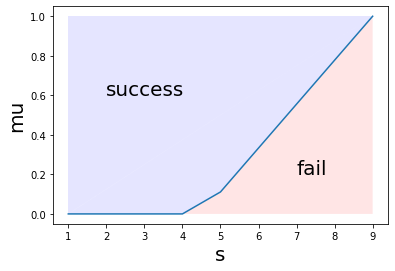

In [75]:
K = 10
s = np.arange(1, K)
mu = np.arange(0.1, 0.9, step = 0.05)
line1 = np.maximum(2 * s / (K - 1) - 1, 0)
plt.plot(s, line1)
plt.xlabel("s", fontsize=20)
plt.ylabel("mu", fontsize=20)
plt.fill(s, line1, facecolor='blue', alpha=0.1)
plt.fill([1, 1, 9], [0, 1, line1[-1]], facecolor='blue', alpha=0.1)
plt.fill([1] + list(s) + [9, 1], [0,] +  list(line1) + [0, 0], facecolor='red', alpha=0.1)
plt.text(2, .6, 'success', fontsize = 20)
plt.text(7, .2, 'fail', fontsize = 20)